In [91]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from datetime import datetime

# Seasonal-Trend Decomposition using LOESS (STL)

## Read the Data

In [119]:
ice_cream_interest = pd.read_csv('ice_cream_interest.csv')
ice_cream_interest.set_index('month', inplace=True)
ice_cream_interest = ice_cream_interest.asfreq(pd.infer_freq(ice_cream_interest.index))

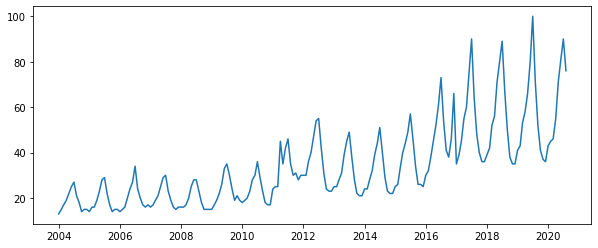

In [121]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)

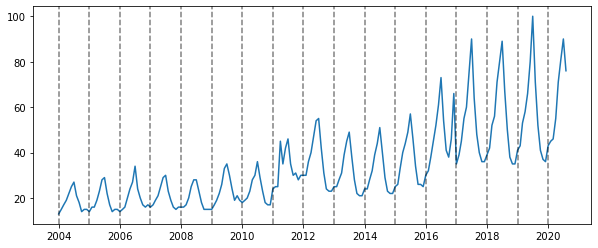

In [138]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
for year in range(2004,2021):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

## Visual Inspection: Mid-2011 and Late-2016

## Perform STL Decomp

In [78]:
stl = STL(ice_cream_interest)
result = stl.fit()

In [79]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

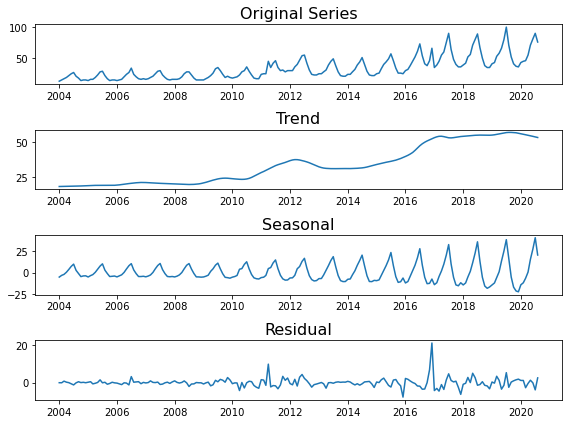

In [80]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(ice_cream_interest)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

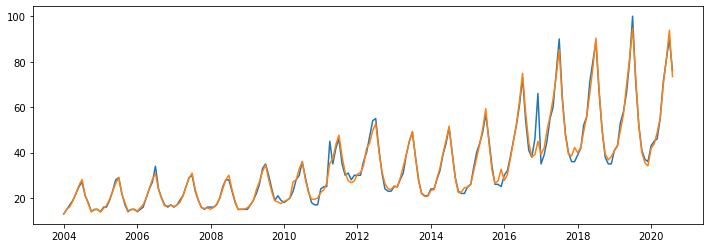

In [85]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(ice_cream_interest)
plt.plot(estimated)

## Anomaly Detection

In [114]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

(731459.0, 737760.0)

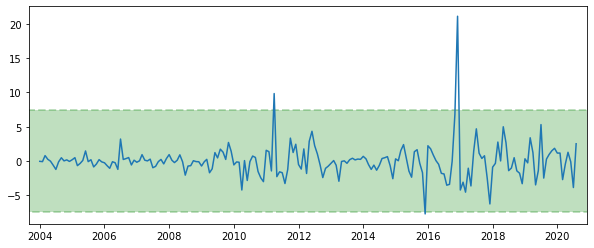

In [115]:
plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([datetime(2003,1,1), datetime(2021,8,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2003,9,1), datetime(2020,12,1))

In [122]:
anomalies = ice_cream_interest[(resid < lower) | (resid > upper)]

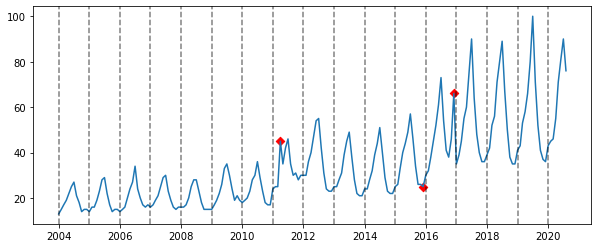

In [137]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
for year in range(2004,2021):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anomalies.index, anomalies.interest, color='r', marker='D')

In [130]:
anomalies

,interest
month,
2011-04-01,45
2015-12-01,25
2016-12-01,66
